<h3> Logistic Regression with Cross Validation </h3>

In [1]:
import pandas as pd
feats=pd.read_csv('osi_project_feats_final.csv')
targets=pd.read_csv('osi_project_target_final.csv')
pd.concat([feats,targets],axis=1).head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_1.1,Region_2.1,Region_3.1,Region_4.1,Region_5.1,Region_6.1,Region_7.1,Region_8.1,Region_9.1,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,1,0,0,0,0,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,1,0,0,0,0,0,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,1,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [3]:
X_train,X_test,y_train,y_test=train_test_split(feats,targets,test_size=0.2)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9864, 77), (2466, 77), (9864, 1), (2466, 1))

In [5]:
import numpy as np
cs=np.logspace(-2,6,9)
model=LogisticRegressionCV(Cs=cs,solver='liblinear', penalty='l1',max_iter=1000,cv=10)

In [6]:
model.fit(X_train,y_train)

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06]),
                     class_weight=None, cv=10, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=1000,
                     multi_class='warn', n_jobs=None, penalty='l1',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [7]:
coeffs=[f'{param}:{coeff}' for param,coeff in sorted(zip(X_train.columns.tolist(),model.coef_[0]))]
for c in coeffs:
    print(c)

Administrative:-0.0018790993314962646
Administrative_Duration:-4.548363042763614e-05
BounceRates:-6.813702728663806
Browser_1:-0.13672466252672758
Browser_10:0.038089464634897624
Browser_11:-4.13315801374234
Browser_12:1.4070064922388361
Browser_13:-0.29832277263476226
Browser_2:-0.30540966083412213
Browser_3:-1.0993236639767474
Browser_4:-0.20265722815522402
Browser_5:-0.02390294563540278
Browser_6:-0.6543104154714308
Browser_7:-0.25369117934857377
Browser_8:-0.10558242857998121
ExitRates:-13.111379259894203
Informational:0.03569442613965114
Informational_Duration:-6.58391457235089e-05
Month_Aug:-0.2579500550661326
Month_Dec:-0.9777604560661882
Month_Feb:-1.8652367306008255
Month_Jul:-0.20673648789187954
Month_June:-0.5263245316144363
Month_Mar:-0.9254106661545525
Month_May:-0.8437946579635531
Month_Nov:0.2316363131428874
Month_Oct:-0.36842060285785144
Month_Sep:-0.28140183065990004
OperatingSystems_1:0.009758926954126265
OperatingSystems_2:0.20109392757851355
OperatingSystems_3:0.064

In [8]:
print('Best parameter for L1 regularization:', model.C_[0])

Best parameter for L1 regularization: 100.0


In [9]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print(accuracy_score(y_pred=y_pred,y_true=y_test))

0.870235198702352


In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred=y_pred,y_true=y_test)
print(cm)

[[1998   64]
 [ 256  148]]


In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,_=precision_recall_fscore_support(y_pred=y_pred,y_true=y_test,average='macro')

In [12]:
print('Precision:',precision,' Recall:',recall,' fscore:',fscore)

Precision: 0.7922686712092548  Recall: 0.6676494031556405  fscore: 0.703188377887173


In [13]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba[:,1])

In [14]:
y_pred_proba[:,0]

array([0.9570479 , 0.95186508, 0.74868427, ..., 0.88664424, 0.13110733,
       0.97383567])

In [15]:
len(tpr),len(fpr)

(440, 440)

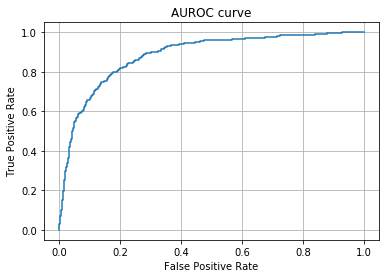

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot((fpr),tpr)
plt.title('AUROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [17]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba[:,1]))

0.8847773477638743


<h3>Using L2</h3>

In [18]:
model=LogisticRegressionCV(Cs=cs, penalty='l2',max_iter=1000,cv=10)

In [19]:
model.fit(X_train,y_train)

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWa

LogisticRegressionCV(Cs=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06]),
                     class_weight=None, cv=10, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=1000,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
y_pred=model.predict(X_test)
print(accuracy_score(y_pred=y_pred,y_true=y_test))

0.8678021086780211


In [27]:
print('Best parameter for L2 regularization:', model.C_[0])
coeffs=[f'{param}:{coeff}' for param,coeff in sorted(zip(X_train.columns.tolist(),model.coef_[0]))]
for c in coeffs:
    print(c)

Best parameter for L2 regularization: 100000.0
Administrative:0.016425133792899293
Administrative_Duration:3.3954942560052227e-06
BounceRates:-0.2050542299326269
Browser_1:-0.06282659184812225
Browser_10:0.06698315756071885
Browser_11:-0.009653694439864061
Browser_12:0.03601583528137232
Browser_13:-0.04804524747694419
Browser_2:-0.11329212070382871
Browser_3:-0.11197246872137404
Browser_4:-0.017062775210899956
Browser_5:0.05941000990888111
Browser_6:-0.12737010395744458
Browser_7:-0.0068926631789696935
Browser_8:-0.0017897753408310328
ExitRates:-0.2514990412687235
Informational:0.03455265450119752
Informational_Duration:-0.00013614425783641708
Month_Aug:0.08518134251945134
Month_Dec:-0.411721694401978
Month_Feb:-0.1705207988823758
Month_Jul:0.09704746799286487
Month_June:-0.07196388680395127
Month_Mar:-0.32944698058179084
Month_May:-0.37366600813087575
Month_Nov:0.6968308217697489
Month_Oct:0.055065865162015996
Month_Sep:0.08548234032265045
OperatingSystems_1:-0.08482257106834674
Opera

In [21]:
cm=confusion_matrix(y_pred=y_pred,y_true=y_test)
print(cm)

[[1995   67]
 [ 259  145]]


In [23]:
precision,recall,fscore,_=precision_recall_fscore_support(y_pred=y_pred,y_true=y_test,average='macro')
print('Precision:',precision,' Recall:',recall,' fscore:',fscore)

Precision: 0.7845277159264034  Recall: 0.6632090827899473  fscore: 0.6976231599725575


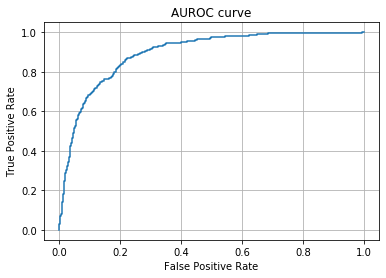

In [24]:
y_pred_proba=model.predict_proba(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba[:,1])
plt.plot((fpr),tpr)
plt.title('AUROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [25]:
print(roc_auc_score(y_test,y_pred_proba[:,1]))

0.8947683686894392


As area under ROC curve for L2 regularization for logistic regression is higher as comapred to logistic regression with L1 regularization so we can conclude the Logistic regression with L2 regularization and regularization parameter 100000 is best fitting